# Ejes de coordenadas en imágenes (OpenCV)

En OpenCV, el sistema de coordenadas de imagen está definido como:
- Origen (0,0) en la **esquina superior izquierda**.  
- El eje **x** (columnas) crece hacia la **derecha**.  
- El eje **y** (filas) crece hacia **abajo**.  

Esto significa que, a diferencia de un sistema cartesiano estándar, el eje **y** positivo va hacia abajo.



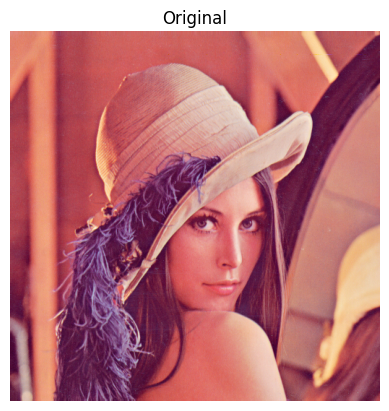

In [3]:
# ✅ Importar librerías y cargar imagen
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ruta usada en los notebooks previos
img_bgr = cv2.imread(r"C:\Users\20808\Documents\Repositorios\Vision_en_Robotica\imagenes\lenna.png")
if img_bgr is None:
    raise FileNotFoundError("⚠️ No se pudo cargar la imagen. Verifica la ruta.")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
h, w = img_rgb.shape[:2]
cx, cy = w//2, h//2

plt.imshow(img_rgb); plt.title("Original"); plt.axis("off"); plt.show()


## Dibujar ejes en el centro de la imagen

- Línea horizontal = eje **x**.  
- Línea vertical = eje **y**.  
- Flechas indicando dirección positiva/negativa.  


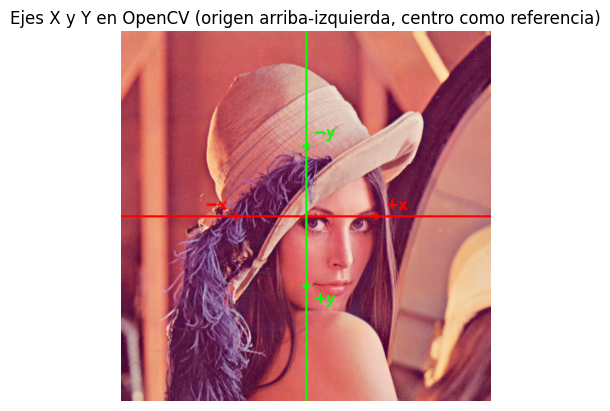

In [4]:
# Copia de la imagen para dibujar
img_axes = img_rgb.copy()

# Colores
color_x = (255,0,0)   # rojo
color_y = (0,255,0)   # verde

# Eje x
cv2.line(img_axes, (0,cy), (w,cy), color_x, 2)
cv2.arrowedLine(img_axes, (cx,cy), (cx+100,cy), color_x, 2, tipLength=0.05)
cv2.putText(img_axes, "+x", (cx+110, cy-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color_x, 2)
cv2.arrowedLine(img_axes, (cx,cy), (cx-100,cy), color_x, 2, tipLength=0.05)
cv2.putText(img_axes, "-x", (cx-140, cy-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color_x, 2)

# Eje y
cv2.line(img_axes, (cx,0), (cx,h), color_y, 2)
cv2.arrowedLine(img_axes, (cx,cy), (cx,cy+100), color_y, 2, tipLength=0.05)
cv2.putText(img_axes, "+y", (cx+10, cy+120), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color_y, 2)
cv2.arrowedLine(img_axes, (cx,cy), (cx,cy-100), color_y, 2, tipLength=0.05)
cv2.putText(img_axes, "-y", (cx+10, cy-110), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color_y, 2)

plt.imshow(img_axes)
plt.title("Ejes X y Y en OpenCV (origen arriba-izquierda, centro como referencia)")
plt.axis("off")
plt.show()


## Importancia en robótica

- Los algoritmos de visión en OpenCV trabajan en este sistema: **(0,0)** esquina superior izquierda, **+x** a la derecha, **+y** hacia abajo.  
- Al relacionar coordenadas de imagen con un sistema **mundo real** (ej. cámara calibrada, robot manipulador), se debe tener en cuenta esta convención.  
- En transformaciones (rotación, traslación, homografía), los signos de ángulos y direcciones dependen de este sistema.  
